# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import seaborn as sns
import urllib
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 582


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [4]:
# Set the API base URL
url = "https://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID="

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + weather_api_key + "&q=" + city
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))
    

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lon = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lon, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | bethel
Processing Record 2 of Set 1 | grytviken
Processing Record 3 of Set 1 | cabo san lucas
Processing Record 4 of Set 1 | port alfred
Processing Record 5 of Set 1 | labrador city
Processing Record 6 of Set 1 | abepura
Processing Record 7 of Set 1 | ilulissat
Processing Record 8 of Set 1 | waitangi
Processing Record 9 of Set 1 | xining
Processing Record 10 of Set 1 | motygino
Processing Record 11 of Set 1 | afaahiti
Processing Record 12 of Set 1 | port-aux-francais
Processing Record 13 of Set 1 | lefka
Processing Record 14 of Set 1 | hermanus
Processing Record 15 of Set 1 | sitia
Processing Record 16 of Set 1 | port lincoln
Processing Record 17 of Set 1 | ancud
Processing Record 18 of Set 1 | lauro de freitas
Processing Record 19 of Set 1 | chayan
Processing Record 20 of Set 1 | zhezqazghan
Processing Record 21 of Set 1 | mandera
Processing Record 22 of Set 1 | remire-montjoly
Processing Record

Processing Record 38 of Set 4 | 'ohonua
City not found. Skipping...
Processing Record 39 of Set 4 | tokar
Processing Record 40 of Set 4 | emiliano zapata
Processing Record 41 of Set 4 | zemio
Processing Record 42 of Set 4 | port hueneme
Processing Record 43 of Set 4 | puerto aysen
Processing Record 44 of Set 4 | kamyzyak
Processing Record 45 of Set 4 | mahina
Processing Record 46 of Set 4 | agapovka
Processing Record 47 of Set 4 | thunder bay
Processing Record 48 of Set 4 | baiti
Processing Record 49 of Set 4 | port saint john's
Processing Record 0 of Set 5 | ciechocinek
Processing Record 1 of Set 5 | goronyo
Processing Record 2 of Set 5 | kishtwar
Processing Record 3 of Set 5 | chanika
Processing Record 4 of Set 5 | axim
Processing Record 5 of Set 5 | siwa oasis
Processing Record 6 of Set 5 | el calafate
Processing Record 7 of Set 5 | iskateley
Processing Record 8 of Set 5 | los llanos de aridane
Processing Record 9 of Set 5 | lompoc
Processing Record 10 of Set 5 | espargos
City not f

Processing Record 29 of Set 8 | pangai
Processing Record 30 of Set 8 | fort abbas
Processing Record 31 of Set 8 | pangody
Processing Record 32 of Set 8 | sinop
Processing Record 33 of Set 8 | sovetskaya gavan'
Processing Record 34 of Set 8 | valparaiso
Processing Record 35 of Set 8 | saint-joseph
Processing Record 36 of Set 8 | jieshi
Processing Record 37 of Set 8 | okhotsk
Processing Record 38 of Set 8 | kalinovskaya
Processing Record 39 of Set 8 | vetapalem
Processing Record 40 of Set 8 | hats'avan
Processing Record 41 of Set 8 | villa avila camacho
Processing Record 42 of Set 8 | chauk
Processing Record 43 of Set 8 | guanica
Processing Record 44 of Set 8 | klyuchi
Processing Record 45 of Set 8 | malaya vishera
Processing Record 46 of Set 8 | leppavirta
Processing Record 47 of Set 8 | ciudad sabinas hidalgo
Processing Record 48 of Set 8 | winterberg
Processing Record 49 of Set 8 | taroudant
Processing Record 0 of Set 9 | al bardiyah
Processing Record 1 of Set 9 | huaihua
Processing R

Processing Record 22 of Set 12 | dhamar
Processing Record 23 of Set 12 | hihifo
City not found. Skipping...
Processing Record 24 of Set 12 | devinuwara
City not found. Skipping...
Processing Record 25 of Set 12 | ubatuba
Processing Record 26 of Set 12 | fada
Processing Record 27 of Set 12 | sydney
Processing Record 28 of Set 12 | rimouski
Processing Record 29 of Set 12 | puerto san carlos
City not found. Skipping...
Processing Record 30 of Set 12 | illizi
Processing Record 31 of Set 12 | torres
-----------------------------
Data Retrieval Complete      
-----------------------------


In [5]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          555
Lat           555
Lng           555
Max Temp      555
Humidity      555
Cloudiness    555
Wind Speed    555
Country       555
Date          555
dtype: int64

In [6]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,bethel,41.3712,-73.4140,55.71,81,93,2.04,US,1683330469
1,grytviken,-54.2811,-36.5092,36.68,89,54,11.99,GS,1683330463
2,cabo san lucas,22.8909,-109.9124,88.90,46,40,4.61,MX,1683330363
3,port alfred,-33.5906,26.8910,62.19,94,0,4.21,ZA,1683330043
4,labrador city,52.9463,-66.9114,55.31,35,20,14.97,CA,1683330506


In [7]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [8]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,bethel,41.3712,-73.4140,55.71,81,93,2.04,US,1683330469
1,grytviken,-54.2811,-36.5092,36.68,89,54,11.99,GS,1683330463
2,cabo san lucas,22.8909,-109.9124,88.90,46,40,4.61,MX,1683330363
3,port alfred,-33.5906,26.8910,62.19,94,0,4.21,ZA,1683330043
4,labrador city,52.9463,-66.9114,55.31,35,20,14.97,CA,1683330506


In [15]:
city_data_df.count()

City          555
Lat           555
Lng           555
Max Temp      555
Humidity      555
Cloudiness    555
Wind Speed    555
Country       551
Date          555
dtype: int64

### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

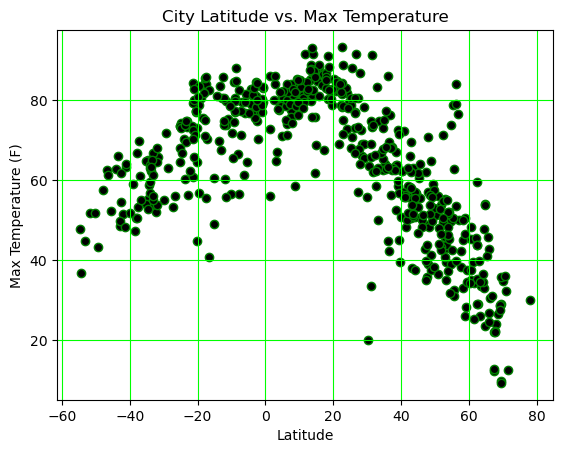

In [29]:
plt.scatter(city_data_df["Lat"],city_data_df["Max Temp"],edgecolors="green",facecolors="black")
plt.title("City Latitude vs. Max Temperature")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid (True,which="major",axis="both",linestyle="-",color="lime")
            
# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

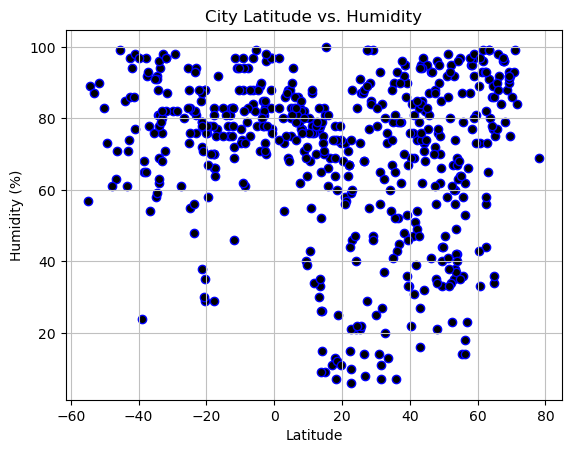

In [31]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"],city_data_df["Humidity"],edgecolors="blue",facecolors="black")

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid (True,which="major",axis="both",linestyle="-",color="silver")

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

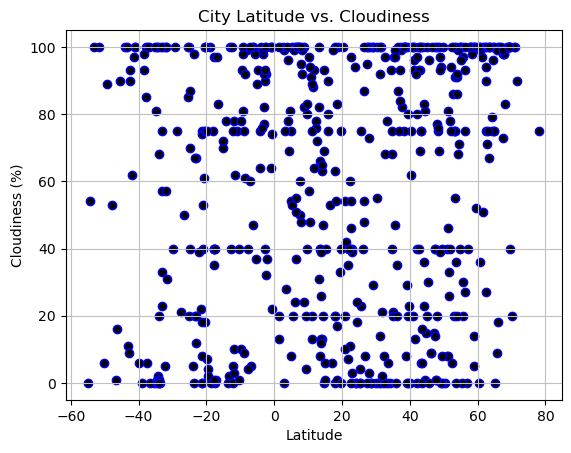

In [32]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"],city_data_df["Cloudiness"],edgecolors="blue",facecolors="black")

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid (True,which="major",axis="both",linestyle="-",color="silver")

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

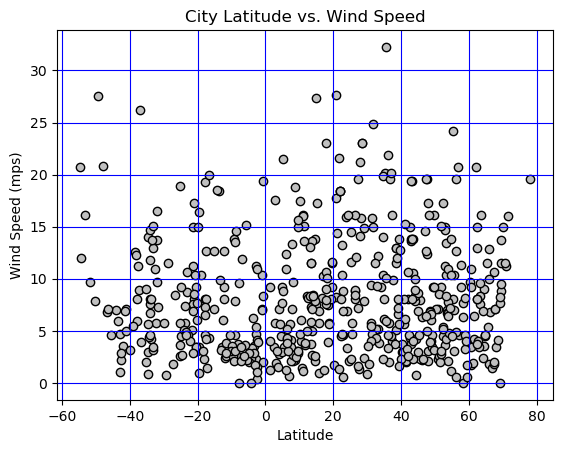

In [33]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"],city_data_df["Wind Speed"],edgecolors="black",facecolors="silver")

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mps)")
plt.grid (True,which="major",axis="both",linestyle="-",color="blue")

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [12]:
# Define a function to create Linear Regression plots
# YOUR CODE HERE

In [13]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
# YOUR CODE HERE

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,faya,18.3851,42.4509,22.06,35,21,2.60,SA,1666108228
1,farsund,58.0948,6.8047,13.30,100,0,7.65,NO,1666108228
3,jamestown,42.0970,-79.2353,5.77,77,100,9.77,US,1666107934
4,lanzhou,36.0564,103.7922,14.53,48,59,1.20,CN,1666108230
6,albany,42.6001,-73.9662,10.36,74,29,2.10,US,1666108231


In [14]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
# YOUR CODE HERE

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,new norfolk,-42.7826,147.0587,11.72,58,12,1.34,AU,1666108230
5,ushuaia,-54.8000,-68.3000,8.81,81,75,3.09,AR,1666108231
7,carnarvon,-24.8667,113.6333,20.02,76,0,7.46,AU,1666108232
9,saint-pierre,-21.3393,55.4781,22.82,68,0,5.14,RE,1666108236
10,colorado,-22.8375,-51.9731,20.36,86,96,4.69,BR,1666107965


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: 0.7161472181434118


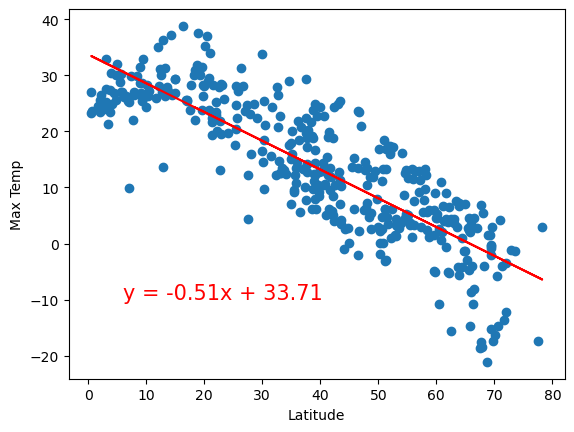

In [15]:
# Linear regression on Northern Hemisphere
# YOUR CODE HERE

The r-value is: 0.4121057168607245


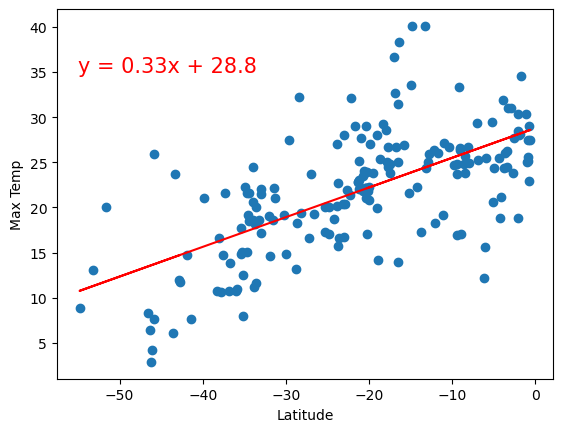

In [16]:
# Linear regression on Southern Hemisphere
# YOUR CODE HERE

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.05689741545789598


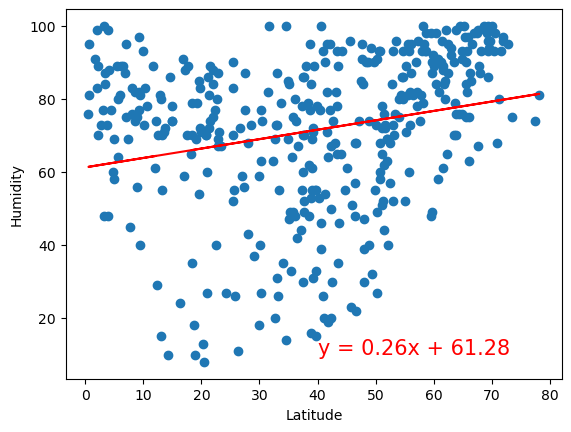

In [17]:
# Northern Hemisphere
# YOUR CODE HERE

The r-value is: 0.0002808747046324607


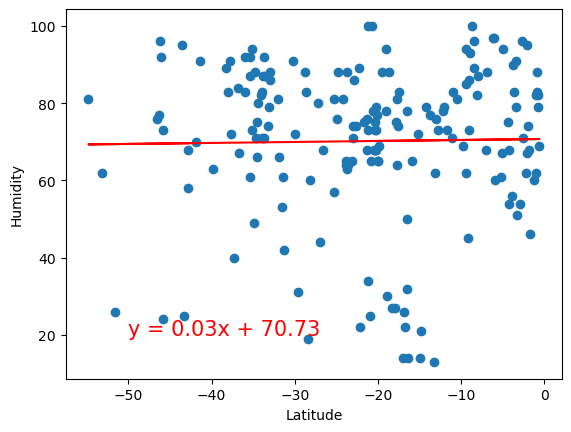

In [18]:
# Southern Hemisphere
# YOUR CODE HERE

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.024026517125811015


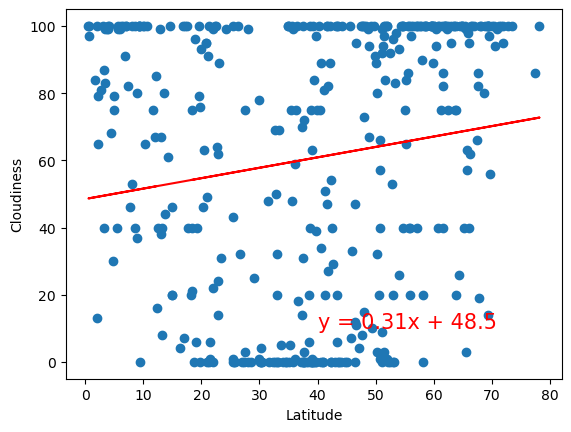

In [19]:
# Northern Hemisphere
# YOUR CODE HERE

The r-value is: 0.02056735429994368


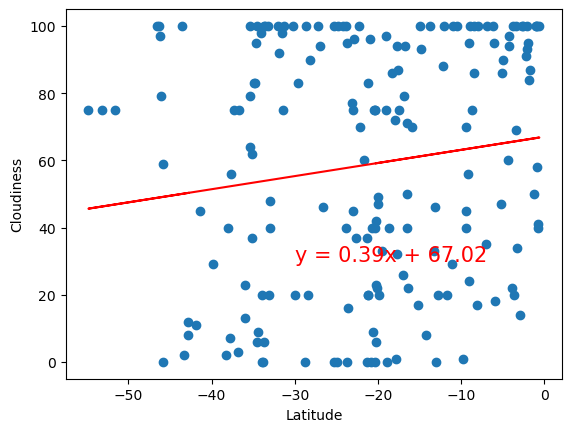

In [20]:
# Southern Hemisphere
# YOUR CODE HERE

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.030396762354449467


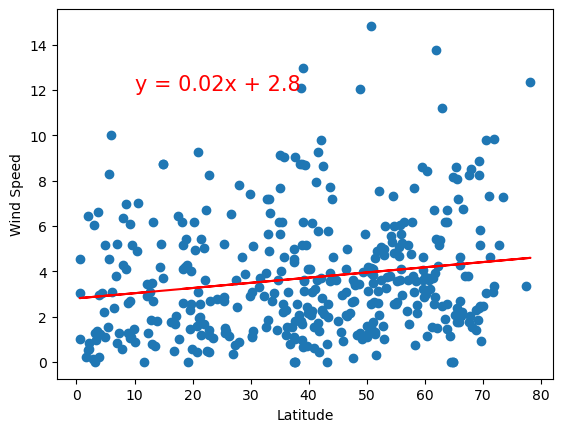

In [21]:
# Northern Hemisphere
# YOUR CODE HERE

The r-value is: 0.062239040700515696


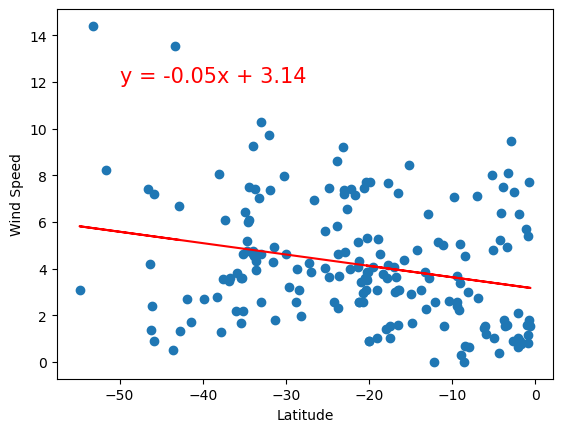

In [22]:
# Southern Hemisphere
# YOUR CODE HERE

**Discussion about the linear relationship:** YOUR RESPONSE HERE